In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
dataset = pd.read_csv('xclara.csv',header=0)

In [3]:
print(dataset.head())

          V1         V2
0   2.072345  -3.241693
1  17.936710  15.784810
2   1.083576   7.319176
3  11.120670  14.406780
4  23.711550   2.557729


In [4]:
v1 = dataset.iloc[:,0].values
v2 = dataset.iloc[:,1].values

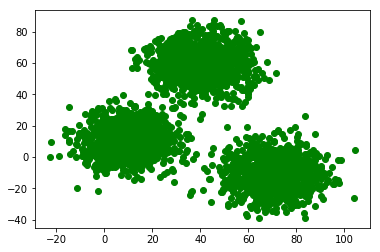

In [5]:
plt.scatter(v1,v2,color='green')

In [7]:
X = dataset.iloc[:,:].values

In [8]:
n_clusters = []
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    n_clusters.append(i)

Text(0, 0.5, 'Within-cluster sum of square of erros(wcss)')

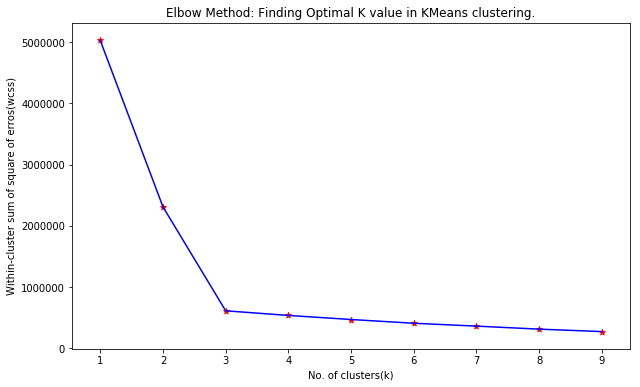

In [11]:
plt.figure(figsize=(10,6))
plt.plot(n_clusters,wcss,color='blue')
plt.scatter(n_clusters,wcss,color='red',marker='*')
plt.title('Elbow Method: Finding Optimal K value in KMeans clustering.')
plt.xlabel('No. of clusters(k)')
plt.ylabel('Within-cluster sum of square of erros(wcss)')

# Here the Elbow arises at K = 3

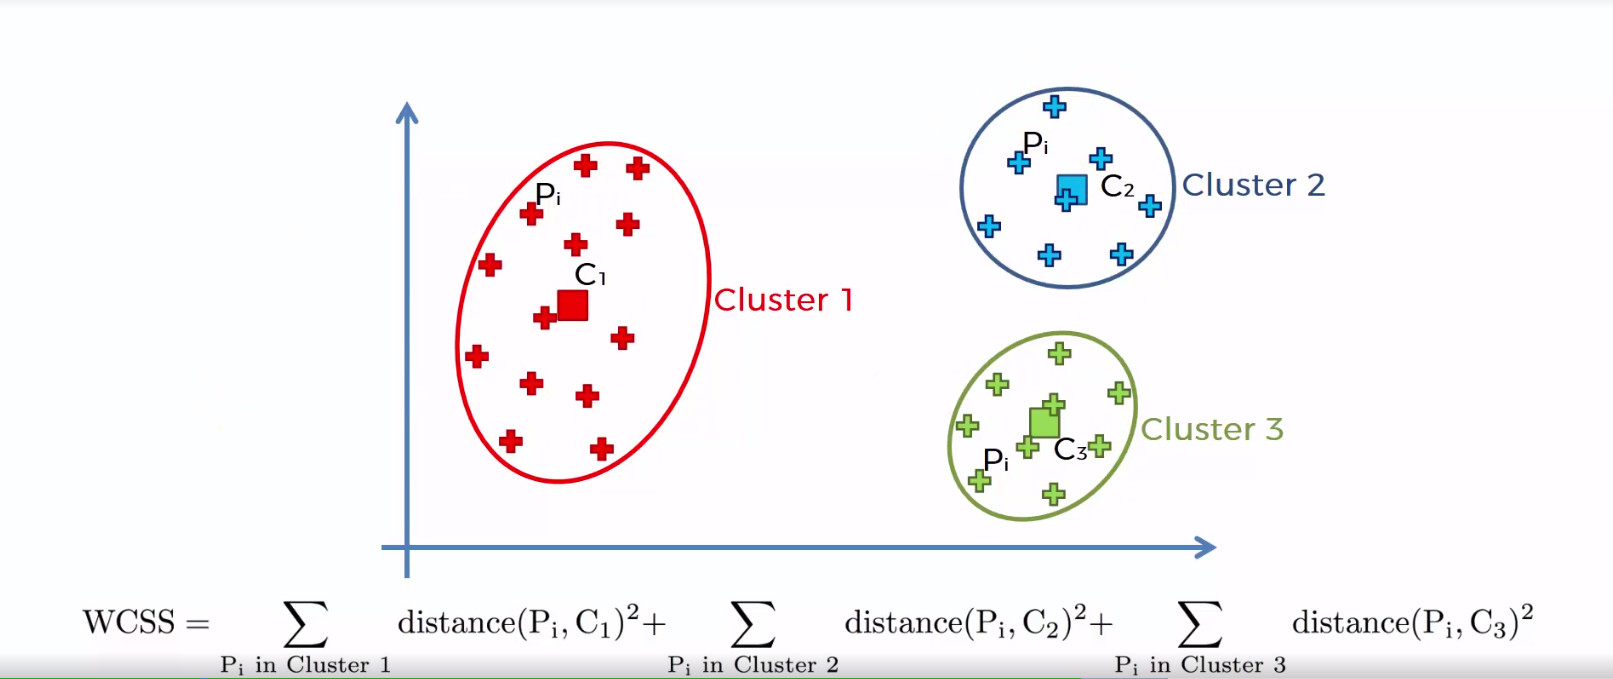

# This is Wcss = within cluster sum of square of errors

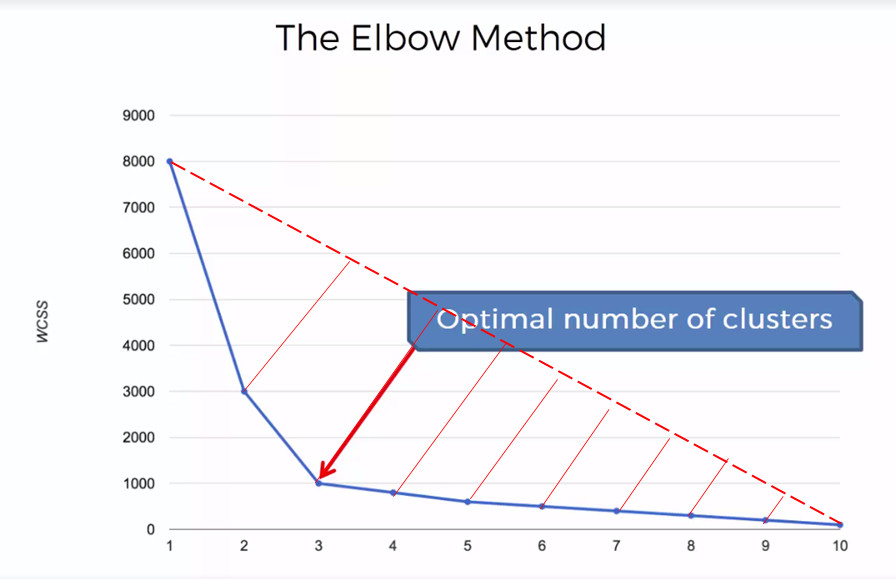

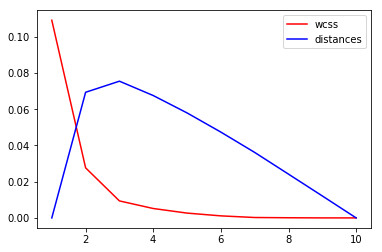

# How to dynamically determine this point of K using code

In [16]:
class Point():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def dist_to_line(self,p1,p2):
        line = []
        for i in np.arange(1,10,0.1):
            y= p1.y+((p2.y-p1.y)/(p2.x-p1.x))*i
            line.append((i,y))
        distances = []
        for item in line:
            distance = np.sqrt(((self.x-item[0])**2)+((self.y-item[1])**2))
            distances.append(distance)
        return np.min(distances)          

# ----- Testing Point Class ---------

In [17]:
p1 = Point(2,4)
p2 = Point(4,2)
p3 = Point(1,1)
dist = p3.dist_to_line(p1,p2)
print(dist)

1.4142135623730951


# ------ Testing Complete --------

In [18]:
p1 = Point(n_clusters[0],wcss[0])
p2 = Point(n_clusters[-1],wcss[-1])

In [24]:
def find_optimal_k(n_clusters,wcss):
    distances = []
    for i in range(len(wcss)):
        p = Point(n_clusters[i],wcss[i])
        dist = p.dist_to_line(p1,p2)
        print(dist)
        distances.append(dist)
    K = np.argmax(distances)+1
    return K

In [25]:
k = find_optimal_k(n_clusters,wcss)

594851.0842874348
15867.28098392647
16929.19227146215
25970.63898517126
19040.850023182662
17262.207050229183
29603.649971663803
19510.13779316754
0.9999999999999929


In [23]:
print(k)

1


In [26]:
print(n_clusters,wcss,p1,)

[1, 2, 3, 4, 5, 6, 7, 8, 9] [5030433.09612008, 2309985.389168787, 611605.8806933891, 535535.4942712302, 469120.596938579, 407856.8456344667, 360990.9887172298, 311599.3924564292, 271624.4218206001]
